In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,8)

FILEPATH = {
    '/Users/abilangbridge/Downloads/PPO_simple_ba65f_00000_0_2023-03-08_20-42-23/': '1 agent train',
    '/Users/abilangbridge/Downloads/PPO_simple_445bb_00000_0_2023-03-10_19-03-39/': '10 agent train',
    # '/Users/abilangbridge/Downloads/PPO_simple_0af5b_00000_0_2023-03-13_01-40-32/': '1,000 agent train',
}

In [206]:
df = pd.read_csv('optimality_eval.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.head()

,filepath,checkpoint,num_agents,mean_len,mean_tot_reward,mean_optimality,optimality_0,optimality_1,optimality_2
0,/Users/abilangbridge/Downloads/PPO_simple_ba65...,50,1,3.249267,-59096.058061,0.546391,0.546391,NaN,NaN
1,/Users/abilangbridge/Downloads/PPO_simple_ba65...,100,1,2.638806,-899.678060,0.560637,0.560637,NaN,NaN
2,/Users/abilangbridge/Downloads/PPO_simple_ba65...,150,1,2.678019,-40638.477907,0.578919,0.578919,NaN,NaN
3,/Users/abilangbridge/Downloads/PPO_simple_ba65...,200,1,2.625954,-17408.640449,0.559126,0.559126,NaN,NaN
4,/Users/abilangbridge/Downloads/PPO_simple_ba65...,250,1,2.577982,-921.135324,0.604998,0.604998,NaN,NaN


1 agent train, 1 agents test: unfit 0.744, fit nan
1 agent train, 10 agents test: unfit 0.781, fit 0.784
10 agent train, 1 agents test: unfit 0.765, fit nan
10 agent train, 10 agents test: unfit 0.847, fit 0.847


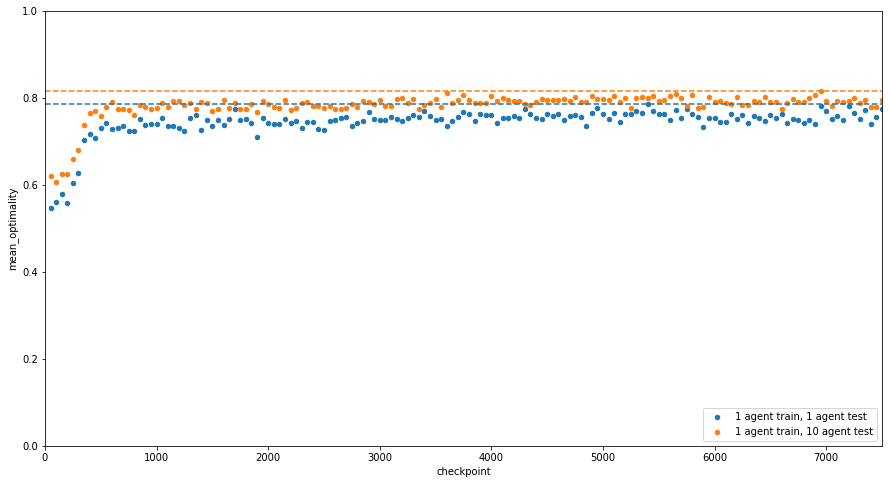

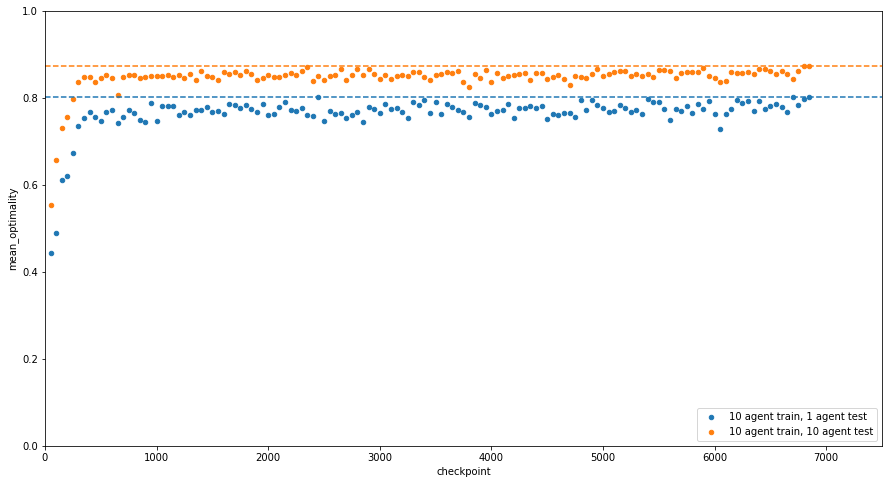

In [207]:
for path, alias in FILEPATH.items():
    fig = plt.figure()
    ax = plt.gca()
    plt.ylim(0, 1)
    plt.xlim(0, 7500)

    tmp = df[df.filepath == path]

    for agents in tmp.num_agents.unique():
        if agents == 10: color = 'tab:orange'
        else: color = 'tab:blue'
        tmp[tmp.num_agents == agents].plot(kind='scatter', x='checkpoint', y='mean_optimality', ax=ax, color=color, label=f'{alias}, {agents} agent test')
        ax.hlines(y=tmp[tmp.num_agents == agents].mean_optimality.max(), xmin=plt.xlim()[0], xmax=plt.xlim()[1], colors=color, linestyles='--')
        
        print(f'{alias}, {agents} agents test: unfit {tmp[tmp.num_agents == agents].optimality_0.mean():.3f}, fit {tmp[tmp.num_agents == agents].optimality_2.mean():.3f}')

    plt.legend(loc='lower right')